Import the "pandas" library which allows us to create a dataframe to view, and later manipulate, the CSV data file.

In [93]:
import pandas as pd
from IPython.display import display_html 

Read the CSV file containing the UN Habitat data classsifying the operational zones according to the socioeconomic status of the residents. The file was read into a dataframe by specifying its location (directory) on the computer.

In [2]:
data_file = 'C:\\Users\\hayth\\Desktop\\SocioEconomic_Zones_UNHabitat.csv'
df = pd.read_csv(data_file)
df.head()

,ACS_CODE_1,Cadaster_1,Cadaster_A,District_1,District_A,Governorat,Governor_1,zone_numbe,UN_Habitat,Comment
0,10999,Beirut Central District,??? ?????,Beirut,?????,Beirut,?????,1,Not residential,NaN
1,10450,Marfa' fonci�,????,Beirut,?????,Beirut,?????,2,None�po,NaN
2,10350,Bachoura fonci�,??????,Beirut,?????,Beirut,?????,3,None�po,NaN
3,10450,Marfa' fonci�,????,Beirut,?????,Beirut,?????,4,Half poor/half not poor,NaN
4,10610,Mdaouar fonci�,????,Beirut,?????,Beirut,?????,5,Not residential,NaN


Customize the dataframe by keeping only the data that contirbute to the scope of this project. The approach was dropping irrelevany columns from the dataframe.

In [3]:
df = df.drop(columns=['Cadaster_A', 'District_1', 'District_A', 'Governorat', 'Governor_1', 'Comment'])
df.head()

,ACS_CODE_1,Cadaster_1,zone_numbe,UN_Habitat
0,10999,Beirut Central District,1,Not residential
1,10450,Marfa' fonci�,2,None�po
2,10350,Bachoura fonci�,3,None�po
3,10450,Marfa' fonci�,4,Half poor/half not poor
4,10610,Mdaouar fonci�,5,Not residential


In [4]:
df.rename(columns={'ACS_CODE_1':'ACS Code', 'Cadaster_1':'Cadaster', 'zone_numbe':'Zone Number'}, inplace=True)
df.head()

,ACS Code,Cadaster,Zone Number,UN_Habitat
0,10999,Beirut Central District,1,Not residential
1,10450,Marfa' fonci�,2,None�po
2,10350,Bachoura fonci�,3,None�po
3,10450,Marfa' fonci�,4,Half poor/half not poor
4,10610,Mdaouar fonci�,5,Not residential


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 4 columns):
ACS Code       189 non-null int64
Cadaster       189 non-null object
Zone Number    189 non-null object
UN_Habitat     189 non-null object
dtypes: int64(1), object(3)
memory usage: 6.0+ KB


In [160]:
clean_df.value_counts()

Half poor/half not poor    58
Majority poor              54
None poor                  31
All poor                   23
Minority poor              18
Not residential             5
Name: UN_Habitat, dtype: int64

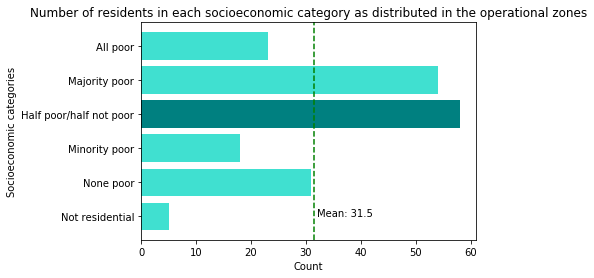

In [215]:
clean_df=df['UN_Habitat'].replace({'None�po': 'None poor', 'All�po': 'All poor', 'Minority�po': 'Minority poor'})

y = [5,31,18,58,54,23]
x = ['Not residential', 'None poor', 'Minority poor', 'Half poor/half not poor','Majority poor', 'All poor'  ]

def Average(lst):
    return sum(lst) / len(lst)
avg = Average(y)
plt.axvline(avg, color='g', linestyle='--')
plt.text(32,0,'Mean: {}'.format(avg),rotation=0)

plt.barh(x, y, color=['turquoise', 'turquoise', 'turquoise', 'teal', 'turquoise', 'turquoise'])
  
# setting x-label as pen sold
plt.xlabel("Count") 
  
# setting y_label as price
plt.ylabel("Socioeconomic categories")   
plt.title("Number of residents in each socioeconomic category as distributed in the operational zones")
plt.show()

In [6]:
import json

In [7]:
zones_geo = 'C:\\Users\\hayth\\Desktop\\beirut_port_explosion_operational_zones.json'

In [8]:
with open(zones_geo) as geo_file:
    zones_json = json.load(geo_file)

In [9]:
zones_json

{'type': 'FeatureCollection',
 'crs': {'type': 'name', 'properties': {'name': 'EPSG:4326'}},
 'features': [{'type': 'Feature',
   'id': 0,
   'geometry': {'type': 'Polygon',
    'coordinates': [[[35.51226592900008, 33.904213080000034],
      [35.51100407100006, 33.90696231900006],
      [35.510090853000065, 33.90684111600007],
      [35.508892272000026, 33.906679788000076],
      [35.50626591200006, 33.90636560100006],
      [35.50544036600007, 33.906162119000044],
      [35.504532116000064, 33.90581419000006],
      [35.502507682000044, 33.905461278000075],
      [35.501425174000076, 33.90523004700003],
      [35.50054341300006, 33.90497804100005],
      [35.498896296000055, 33.904392210000026],
      [35.49854826200004, 33.90460169100004],
      [35.49846452000003, 33.904504865000035],
      [35.49881516500005, 33.90417619500005],
      [35.49882509200006, 33.90372282800007],
      [35.49872263700007, 33.90317233900004],
      [35.49853226000005, 33.90271606300007],
      [35.4980850

In [10]:
#! pip install folium==0.5.0
import folium # plotting library

print('Folium installed and imported')

Folium installed and imported


We need numerical data to generate the Choropleth maps. Here, the UN Habitat classification is a categorical variable. As such, I will change them to be numerical representation where all poor is 0 and no poor is 5.

To begin with, I need to know the variables in order to add a new column with the corresponding numerical value.

In [11]:
# variable to hold the count
cnt = 0
  
# list to hold visited values
values = []
  
# loop for counting the unique
# values in height
for i in range(0, len(df['UN_Habitat'])):
    
    if df['UN_Habitat'][i] not in values: 
        
        values.append(df['UN_Habitat'][i])
          
        cnt += 1
  
print("No. of unique values :",
      cnt)
  
print("unique values :",
      values)

No. of unique values : 6
unique values : ['Not residential', 'None�po', 'Half poor/half not poor', 'Majority poor', 'All�po', 'Minority�po']


As can be seen, these are the values that the zones are classified into. Now we need to identify their number in order to assign numerical value for each category.

As can be seen, we have 6 unique values, one of them is "Not residential". In this research, we are focusing on assistance provided to people. Hence, we will drop all rows that are non-residential leaving us with 5 categories for zones. 

The designations will be as follow:

    -None poor: 0
    -Minority poor: 1
    -Half poor/half not poor: 2
    -Majority poor: 3
    -All poor: 4

Now we add the numerical designations as a new column in the dataframe. The values will map the "UN_Habitat" column

In [12]:
#df.drop(df.index[df['UN_Habitat'] == 'Not residential'], inplace = True)
df.head()

,ACS Code,Cadaster,Zone Number,UN_Habitat
0,10999,Beirut Central District,1,Not residential
1,10450,Marfa' fonci�,2,None�po
2,10350,Bachoura fonci�,3,None�po
3,10450,Marfa' fonci�,4,Half poor/half not poor
4,10610,Mdaouar fonci�,5,Not residential


In [13]:
df.insert(4, "Numerical_Designation", True)

In [14]:
import numpy as np

In [15]:
# create a list of our conditions
conditions = [
    (df['UN_Habitat'] == 'Not residential'),
    (df['UN_Habitat'] == 'None�po'),
    (df['UN_Habitat'] == 'Minority�po'),
    (df['UN_Habitat'] == 'Half poor/half not poor'),
    (df['UN_Habitat'] == 'Majority poor'),
    (df['UN_Habitat'] == 'All�po')
    ]

# create a list of the values we want to assign for each condition
values = ['0', '1', '2', '3', '4', '5']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Numerical_Designation'] = np.select(conditions, values)

df.head()

,ACS Code,Cadaster,Zone Number,UN_Habitat,Numerical_Designation
0,10999,Beirut Central District,1,Not residential,0
1,10450,Marfa' fonci�,2,None�po,1
2,10350,Bachoura fonci�,3,None�po,1
3,10450,Marfa' fonci�,4,Half poor/half not poor,3
4,10610,Mdaouar fonci�,5,Not residential,0


Now we need to cast (change the type) of the new column from type <i>string</i> (text) to type <i>integer</i> (number)

In [16]:
df['Numerical_Designation'] = pd.to_numeric(df['Numerical_Designation'])
df.dtypes

ACS Code                  int64
Cadaster                 object
Zone Number              object
UN_Habitat               object
Numerical_Designation     int64
dtype: object

Usually if there is a value with 'a' there are another similar values, so we need to view the rows that come after this index at position 155.

In [17]:
zone = df['Zone Number']
i = 155
while i < 160:
    ii = zone[i]
    i+=1
    print("The 5 following rows in the 'zone_numbe' column have the following value: {}".format(ii))
    

The 5 following rows in the 'zone_numbe' column have the following value: 156a
The 5 following rows in the 'zone_numbe' column have the following value: 156b
The 5 following rows in the 'zone_numbe' column have the following value: 157
The 5 following rows in the 'zone_numbe' column have the following value: 158
The 5 following rows in the 'zone_numbe' column have the following value: 159


As can be seen, after index 155, there are only two values with an alphabet which are "156a" and "156b". Hence, we need to change these values at indices 155 and 156 into a purely numeric format to then cast the whole column from the type 'object' to the type 'int'

In [18]:
df.loc[155:156,['Zone Number']] = [156]
df['Zone Number'].loc[155:156]


155    156
156    156
Name: Zone Number, dtype: object

The values have changed successfully into '156'. However, the values are of type "object" unlike the GroJSON file which have the values as type "int". Now we can change the whole "zone_numbe" column into type "int".

In [19]:
df['Zone Number'] = pd.to_numeric(df['Zone Number'])
df.dtypes

ACS Code                  int64
Cadaster                 object
Zone Number               int64
UN_Habitat               object
Numerical_Designation     int64
dtype: object

In [20]:
def add_categorical_legend(folium_map, title, colors, labels):
    if len(colors) != len(labels):
        raise ValueError("colors and labels must have the same length.")

    color_by_label = dict(zip(labels, colors))
    
    legend_categories = ""     
    for label, color in color_by_label.items():
        legend_categories += f"<li><span style='background:{color}'></span>{label}</li>"
        
    legend_html = f"""
    <div id='maplegend' class='maplegend'>
      <div class='legend-title'>{title}</div>
      <div class='legend-scale'>
        <ul class='legend-labels'>
        {legend_categories}
        </ul>
      </div>
    </div>
    """
    script = f"""
        <script type="text/javascript">
        var oneTimeExecution = (function() {{
                    var executed = false;
                    return function() {{
                        if (!executed) {{
                             var checkExist = setInterval(function() {{
                                       if ((document.getElementsByClassName('leaflet-top leaflet-right').length) || (!executed)) {{
                                          document.getElementsByClassName('leaflet-top leaflet-right')[0].style.display = "flex"
                                          document.getElementsByClassName('leaflet-top leaflet-right')[0].style.flexDirection = "column"
                                          document.getElementsByClassName('leaflet-top leaflet-right')[0].innerHTML += `{legend_html}`;
                                          clearInterval(checkExist);
                                          executed = true;
                                       }}
                                    }}, 100);
                        }}
                    }};
                }})();
        oneTimeExecution()
        </script>
      """
   

    css = """

    <style type='text/css'>
      .maplegend {
        z-index:9999;
        float:right;
        background-color: rgba(255, 255, 255, 1);
        border-radius: 5px;
        border: 2px solid #bbb;
        padding: 10px;
        font-size:12px;
        positon: relative;
      }
      .maplegend .legend-title {
        text-align: left;
        margin-bottom: 5px;
        font-weight: bold;
        font-size: 90%;
        }
      .maplegend .legend-scale ul {
        margin: 0;
        margin-bottom: 5px;
        padding: 0;
        float: left;
        list-style: none;
        }
      .maplegend .legend-scale ul li {
        font-size: 80%;
        list-style: none;
        margin-left: 0;
        line-height: 18px;
        margin-bottom: 2px;
        }
      .maplegend ul.legend-labels li span {
        display: block;
        float: left;
        height: 16px;
        width: 30px;
        margin-right: 5px;
        margin-left: 0;
        border: 0px solid #ccc;
        }
      .maplegend .legend-source {
        font-size: 80%;
        color: #777;
        clear: both;
        }
      .maplegend a {
        color: #777;
        }
    </style>
    """

    folium_map.get_root().header.add_child(folium.Element(script + css))

    return folium_map

In [21]:
zones_map = folium.Map(location=[33.8994574,35.5144002], tiles='cartodbpositron', zoom_start=13)
zones_map.choropleth(
    geo_data=zones_json,
    data=df,
    columns=["Zone Number", "Numerical_Designation"],
    key_on='feature.properties.OBJECTID_1',
    fill_color='GnBu',
    fill_opacity=1,
    line_opacity=0.5,
    legend_name='Poverty Levels in UN Operational Zones',
    smooth_factor=0
    )

#Add categorical legend utilizing the previously defined function
zones_map = add_categorical_legend(zones_map, 'Poverty Levels in UN Operational Zones', colors = ['#ccebc5','#a8ddb5', '#7bccc4', '#4eb3d3', '#2b8cbe', '#08589e'], labels = ['Not residential', 'None poor', 'Minority poor', 'Half poor/half not poor', 'Majority poor', 'All poor'])

#Delete the numerical legend autimatically generated by Foliium
for key in zones_map._children:
    if key.startswith('color_map'):
        del(zones_map._children[key])
        
#Add marker to indicate the blast zone
folium.Marker(location=[33.901389,35.519167],popup='Beirut Port Blast Zone',icon=folium.Icon(color='red',icon='fire')).add_to(zones_map)

#display map
zones_map

We can extract the coordinates from the ShapeFile (.SHP) provided using the <i>Geo-pandas Dataframe</i> library.

In [22]:
import geopandas as gpd
fname = 'C:\\Users\\hayth\\Desktop\\beirut_port_explosions_operational_zones_139.shp'
Geo = gpd.read_file(fname)
Geo.head()

,OBJECTID_1,ACS_CODE_1,Cadaster_1,Cadaster_A,District_1,District_A,Governorat,Governor_1,zone_numbe,Shape_Leng,Shape_Area,geometry
0,1,10999,Beirut Central District,وسط بيروت,Beirut,بيروت,Beirut,بيروت,1,0.045203,0.000052,"POLYGON ((35.51227 33.90421, 35.51236 33.90393..."
1,2,10610,Mdaouar foncière,مدور,Beirut,بيروت,Beirut,بيروت,5,0.072433,0.000087,"POLYGON ((35.53859 33.90093, 35.53857 33.90182..."
2,3,10450,Marfa' foncière,مرفأ,Beirut,بيروت,Beirut,بيروت,4,0.042240,0.000056,"POLYGON ((35.50775 33.89748, 35.50812 33.89807..."
3,4,10510,Saifi foncière,صيفي,Beirut,بيروت,Beirut,بيروت,13,0.016108,0.000014,"POLYGON ((35.51151 33.89498, 35.50912 33.89510..."
4,5,10550,Rmeil foncière,رميل,Beirut,بيروت,Beirut,بيروت,39,0.011616,0.000006,"POLYGON ((35.53351 33.89629, 35.53329 33.89487..."


Get only the relevant columns in the dataframe that pinpoint the Zone Number and corresponding latitude and longitude array.

In [23]:
Geo=Geo[['zone_numbe','geometry']]
Geo.head()

,zone_numbe,geometry
0,1,"POLYGON ((35.51227 33.90421, 35.51236 33.90393..."
1,5,"POLYGON ((35.53859 33.90093, 35.53857 33.90182..."
2,4,"POLYGON ((35.50775 33.89748, 35.50812 33.89807..."
3,13,"POLYGON ((35.51151 33.89498, 35.50912 33.89510..."
4,39,"POLYGON ((35.53351 33.89629, 35.53329 33.89487..."


Get the GeoJSON coordinates for the two identified zones utilizing the geospatial dataframe.

In [24]:
array1 = Geo.loc[Geo['zone_numbe'] == 62]
print(array1)
array2 = Geo.loc[Geo['zone_numbe'] == 89]
print(array2)

   zone_numbe                                           geometry
5          62  POLYGON ((35.53198 33.88670, 35.53169 33.88613...
     zone_numbe                                           geometry
111          89  POLYGON ((35.54490 33.89019, 35.54470 33.88952...


Get the mean value of the first of the two identified zones (Ashrafiyeh at zone number 62) to pass it as an argument for the Foursquare API.

In [25]:
latitude_1=array1.centroid.x.mean()
longitude_1=array1.centroid.y.mean()

#The process of extracting the coordinates median from the GeoJSON is 100% correct and operational; however, the GeoJSON file 
#has wrong coordinates (showing values in cyprus). So, we utilized Google Maps to get the coordiantes.
latitude_1=33.8860027 
longitude_1=35.5151357
print('For zone number 62, the latitude is {} and the longitude is {}.'.format(latitude_1,longitude_1))

For zone number 62, the latitude is 33.8860027 and the longitude is 35.5151357.


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


Get the mean value of the second of the two identified zones (Bourj Hammoud at zone number 89) to pass it as an argument for the Foursquare API.

In [26]:
latitude_2=array2.centroid.x.mean()
longitude_2=array2.centroid.y.mean()

#The process of extracting the coordinates median from the GeoJSON is 100% correct and operational; however, the GeoJSON file 
#has wrong coordinates (showing values in cyprus). So, we utilized Google Maps to get the coordiantes.
latitude_2=33.8937745
longitude_2=35.5318377
print('For zone number 89, the latitude is {} and the longitude is {}.'.format(latitude_2,longitude_2))

For zone number 89, the latitude is 33.8937745 and the longitude is 35.5318377.


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


<h2>Initialize the Foursquare API

<h4>Import the <i>requests</i> library to receive content from the API in JSON format.

In [27]:
import requests

<h4>Declare the Foursquare credentials and variables</h4>

In [28]:
CLIENT_ID = 'ZTLKNZCELC33KXINJUOXG2EDYQSGTRR5JPETP1DF4OTI3RMU' #Foursquare ID
CLIENT_SECRET = 'A5MSF4DLXAIEPYAJH5VKC52BPHFPLJ03UC4BJBVLVIRTMTSW' #Foursquare Secret
ACCESS_TOKEN = 'L33AUJG4MP4DRH0IUJNUNUFKZFEMCOEQ3QM4153GL1O0SAJK' #FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
radius = 500

<h4>Declare the Foursquare search URL for the first zone as an object</h4>

In [147]:
search_url_1 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_1, longitude_1,ACCESS_TOKEN, VERSION, radius, LIMIT)

<h4>Declare the Foursquare search URL for the second zone as an object</h4>

In [30]:
search_url_2 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_2, longitude_2,ACCESS_TOKEN, VERSION, radius, LIMIT)

<h4>Receive the GET Request and examine the results from the declared URL</h4>

In [149]:
results_1 = requests.get(search_url_1).json()
results_2 = requests.get(search_url_2).json()

<h4>Obtain the relevant part of the JSON of the declared URL</h4>

In [32]:
# assign relevant part of JSON to venues
venues_1 = results_1['response']['venues']
venues_2 = results_2['response']['venues']

<h4>Transform the relevant JSON venues list into a dataframe</h4>

In [33]:
# import the library that allows tranforming json files into a pandas dataframe library
from pandas.io.json import json_normalize


# tranform venues into a dataframe
dataframe_1 = json_normalize(venues_1)
dataframe_2 = json_normalize(venues_2)

#dataframe_1.head()
#dataframe_2.head()

<h4>Filter dataframe 1 according to informaiton of interest.</h4>

In [34]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns_1 = ['name', 'categories'] + [col for col in dataframe_1.columns if col.startswith('location.')] + ['id']
dataframe_filtered_1 = dataframe_1.loc[:, filtered_columns_1]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list_1 = row['categories']
    except:
        categories_list_1 = row['venue.categories']
        
    if len(categories_list_1) == 0:
        return None
    else:
        return categories_list_1[0]['name']

# filter the category for each row
dataframe_filtered_1['categories'] = dataframe_filtered_1.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered_1.columns = [column.split('.')[-1] for column in dataframe_filtered_1.columns]

dataframe_filtered_1.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,LAUMC,Hospital,NaN,LB,Ashrafieh,لبنان,NaN,81,[الأشرفية],"[{'label': 'display', 'lat': 33.885289, 'lng':...",33.885289,35.514948,NaN,محافظة بيروت,58bee6ac18384c3dbf36248d
1,UMC-RH Clinics,Doctor's Office,Rizk Hospital,LB,NaN,لبنان,NaN,106,[Rizk Hospital],"[{'label': 'display', 'lat': 33.88504897283786...",33.885049,35.515131,NaN,NaN,4fdb3029e4b0307f1dae9d52
2,Hospital Rizk,Hospital,Ashrafieh,LB,بيروت,لبنان,NaN,73,"[Ashrafieh, بيروت]","[{'label': 'display', 'lat': 33.88534345365244...",33.885343,35.515038,NaN,محافظة بيروت,4c7752d859a3236ab69dc118
3,Pharmacie Le Gabriel,Pharmacy,Achrafieh street,LB,بيروت,لبنان,NaN,97,"[Achrafieh street, بيروت]","[{'label': 'display', 'lat': 33.8867686470187,...",33.886769,35.514614,NaN,محافظة بيروت,4d4ed588122b5481c553894f
4,St Charles,College Bookstore,NaN,LB,NaN,لبنان,NaN,38,NaN,"[{'label': 'display', 'lat': 33.88631710688109...",33.886317,35.514963,NaN,NaN,50d4310fe4b0bb5640d1dcdc


<h4>Filter dataframe 2 according to informaiton of interest.</h4>

In [35]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns_2 = ['name', 'categories'] + [col for col in dataframe_2.columns if col.startswith('location.')] + ['id']
dataframe_filtered_2 = dataframe_2.loc[:, filtered_columns_2]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list_2 = row['categories']
    except:
        categories_list_2 = row['venue.categories']
        
    if len(categories_list_2) == 0:
        return None
    else:
        return categories_list_2[0]['name']

# filter the category for each row
dataframe_filtered_2['categories'] = dataframe_filtered_2.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered_2.columns = [column.split('.')[-1] for column in dataframe_filtered_2.columns]

dataframe_filtered_2.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,state,id
0,Geitawi Hospital,Hospital,Geitawi,LB,NaN,لبنان,NaN,95,[Geitawi],"[{'label': 'display', 'lat': 33.89387583202703...",33.893876,35.530809,NaN,4ca0dddf19e4236adc526589
1,St Marc Medical Center,Medical Center,Geitaoui Main St,LB,NaN,لبنان,NaN,78,[Geitaoui Main St],"[{'label': 'display', 'lat': 33.89327922035939...",33.893279,35.531236,NaN,4cd51fd189eb6dcb53ad261e
2,Hopital Geitaoui,Medical Center,NaN,LB,Achrafieh,لبنان,NaN,88,[الأشرفية],"[{'label': 'display', 'lat': 33.89423322515332...",33.894233,35.531055,محافظة بيروت,4d5271fb71548cfa0dae269a
3,Ministry Of Energy And Water,Government Building,Corniche El Nahr,LB,NaN,لبنان,NaN,249,[Corniche El Nahr],"[{'label': 'display', 'lat': 33.8932187757975,...",33.893219,35.534449,محافظة بيروت,4e44f05f1f6e0a1ba5e37553
4,Paul,French Restaurant,ABC,LB,Achrafieh,لبنان,NaN,232,"[ABC, الأشرفية]","[{'label': 'display', 'lat': 33.89581603269914...",33.895816,35.532369,محافظة بيروت,4c8f2275daa937043d6252b1


<h4>Create a new dataframe for the first zone showing the data we only need (further filtering)</h4>

In [84]:
main_filtered_1 = dataframe_filtered_1.drop(['address','cc', 'city', 'country', 'crossStreet','distance', 'formattedAddress','labeledLatLngs', 'state', 'id', 'postalCode'], axis=1)
main_filtered_1.head(10)

,name,categories,lat,lng
0,LAUMC,Hospital,33.885289,35.514948
1,UMC-RH Clinics,Doctor's Office,33.885049,35.515131
2,Hospital Rizk,Hospital,33.885343,35.515038
3,Pharmacie Le Gabriel,Pharmacy,33.886769,35.514614
4,St Charles,College Bookstore,33.886317,35.514963
5,Byblos Bank Headoffice,Building,33.886525,35.516633
6,Nazareth,College Academic Building,33.885474,35.514765
7,Sushiwa,Sushi Restaurant,33.886816,35.515615
8,UMCRH,Hospital,33.885507,35.514866
9,G Spa,Spa,33.886312,35.514688


<h4>Create a new dataframe for the second zone showing the data we only need (further filtering)</h4>

In [38]:
main_filtered_2 = dataframe_filtered_2.drop(['address','cc', 'city', 'country', 'crossStreet','distance', 'formattedAddress','labeledLatLngs', 'state', 'id'], axis=1)
main_filtered_2.head(10)

,name,categories,lat,lng
0,Geitawi Hospital,Hospital,33.893876,35.530809
1,St Marc Medical Center,Medical Center,33.893279,35.531236
2,Hopital Geitaoui,Medical Center,33.894233,35.531055
3,Ministry Of Energy And Water,Government Building,33.893219,35.534449
4,Paul,French Restaurant,33.895816,35.532369
5,tusk,Bakery,33.894026,35.533797
6,Chez Ghassan,Bakery,33.896260,35.534023
7,Lebanese Hospital Geitaoui,Hospital,33.894263,35.531058
8,Mario e Mario,Italian Restaurant,33.895583,35.532594
9,Riwaq,Café,33.895279,35.531679


<h4>Import the <i>sklearn</i> library to import the <i>kmeans</i> library

In [89]:
from sklearn.cluster import KMeans

<h4>Let's check how many venues were returned for each zone

<h4>Determine the number of unique categories can be curated from all the returned venues

In [105]:
print('There are {} unique categories in Ashrafieh.'.format(len(main_filtered_1['categories'].unique())))
print('There are {} unique categories in Bourj Hammoud.'.format(len(main_filtered_2['categories'].unique())))

There are 24 unique categories in Ashrafieh.
There are 25 unique categories in Bourj Hammoud.


<h4>Determine the top categories of venues in these two locations.

In [115]:
main1=main_filtered_1.groupby('categories').count()
main1=main1.drop(['lat', 'lng'], axis=1)
main1=main1.sort_values(by=['name'], ascending=False)

main2=main_filtered_2.groupby('categories').count()
main2=main2.drop(['lat', 'lng'], axis=1)
main2=main2.sort_values(by=['name'], ascending=False)


main1_styler = main1.style.set_table_attributes("style='display:inline'").set_caption('Ashrafieh Zone 62')
main2_styler = main2.style.set_table_attributes("style='display:inline'").set_caption('Bourj Hammoud Zone 89')

display_html(main1_styler._repr_html_()+main2_styler._repr_html_(), raw=True)

,name
categories,
Hospital,4
Building,2
Restaurant,2
Hotel,2
Assisted Living,1
Miscellaneous Shop,1
Tex-Mex Restaurant,1
Sushi Restaurant,1
Supermarket,1


In [109]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as colors

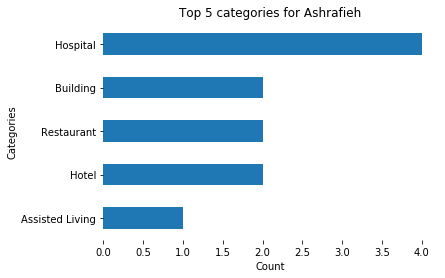

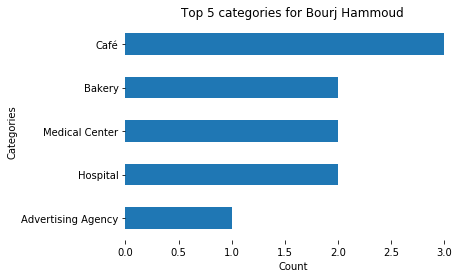

In [141]:
# top 5 categories for both Zones

#Ashrafieh
top5_main1 = main1.iloc[:5]
ax1 = top5_main1.plot(kind = 'barh', figsize = (6, 4), legend=None)
ax1.set_title('Top 5 categories for Ashrafieh')
ax1.set_xlabel('Count')
ax1.set_ylabel('Categories')
ax1.invert_yaxis()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Bourj Hammoud
top5_main2 = main2.iloc[:5]
ax1 = top5_main2.plot(kind = 'barh', figsize = (6, 4), legend=None)
ax1.set_title('Top 5 categories for Bourj Hammoud')
ax1.set_xlabel('Count')
ax1.set_ylabel('Categories')
ax1.invert_yaxis()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)




myscale = (nilpop['Numerical_Designation'].quantile((0,0.1,0.75,0.9,0.98,1))).tolist()
import branca.colormap as cm
colormap = cm.linear.YlGnBu_09
mymap = folium.Map(location=[y_map, x_map], zoom_start=11,tiles=None)
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(mymap)
colormap.caption = "Poverty Levels in UN Operational Zones"
style_function = lambda x: {"weight":0.5, 
                            'color':'black',
                            'fillColor':colormap(x['properties']['PER_FOREIGN']), 
                            'fillOpacity':0.75}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL=folium.features.GeoJson(
        #nilpop,
        style_function=style_function,
        control=False,
        highlight_function=highlight_function,
        tooltip=folium.features.Tooltip(fields=['Cadaster','UN_Habitat'],
            aliases=['Cadaster: ','Socioeconomic status of residents: '],
            style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;"),
            sticky=True,
            location=[y_map, x_map],
        )
    )
colormap.add_to(mymap)
mymap.add_child(NIL)
mymap